# Airbnb Data Analysis by Abhishek Kopparapu

In this notebook I have analysed how each feature is related to target variable:destination country and predicting country destination using various classification models.

In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime

my_data = pd.read_csv('train_users_2.csv')

print("There are total ", my_data.shape[0],"Rows and", my_data.shape[1], "Columns")

print("Lets see sample data:")
my_data.head(10)



There are total  213451 Rows and 16 Columns
Lets see sample data:


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


Lets check the variables and their datatypes

In [48]:

my_data.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

We can change the data type of date_account_created and date_first_booking from object to date 

In [49]:
my_data['date_account_created'] = pd.to_datetime(my_data['date_account_created'], errors = 'coerce')
my_data['date_first_booking'] = pd.to_datetime(my_data['date_first_booking'],errors = 'coerce')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(11)
memory usage: 2

Lets check for nulls in the data frame and if any print the name of the variables having nulls.

In [50]:
my_list = np.array
for i in range(0,15):
        if((my_data.iloc[:,i].isnull().any().any())==True):
          my_list= np.append(my_list,my_data.columns.values[i])

print("These variables have null values in them:",",".join(list(my_list)[1:]))

These variables have null values in them: date_first_booking,age,first_affiliate_tracked


Now, lets visualize the nulls density in each variable.

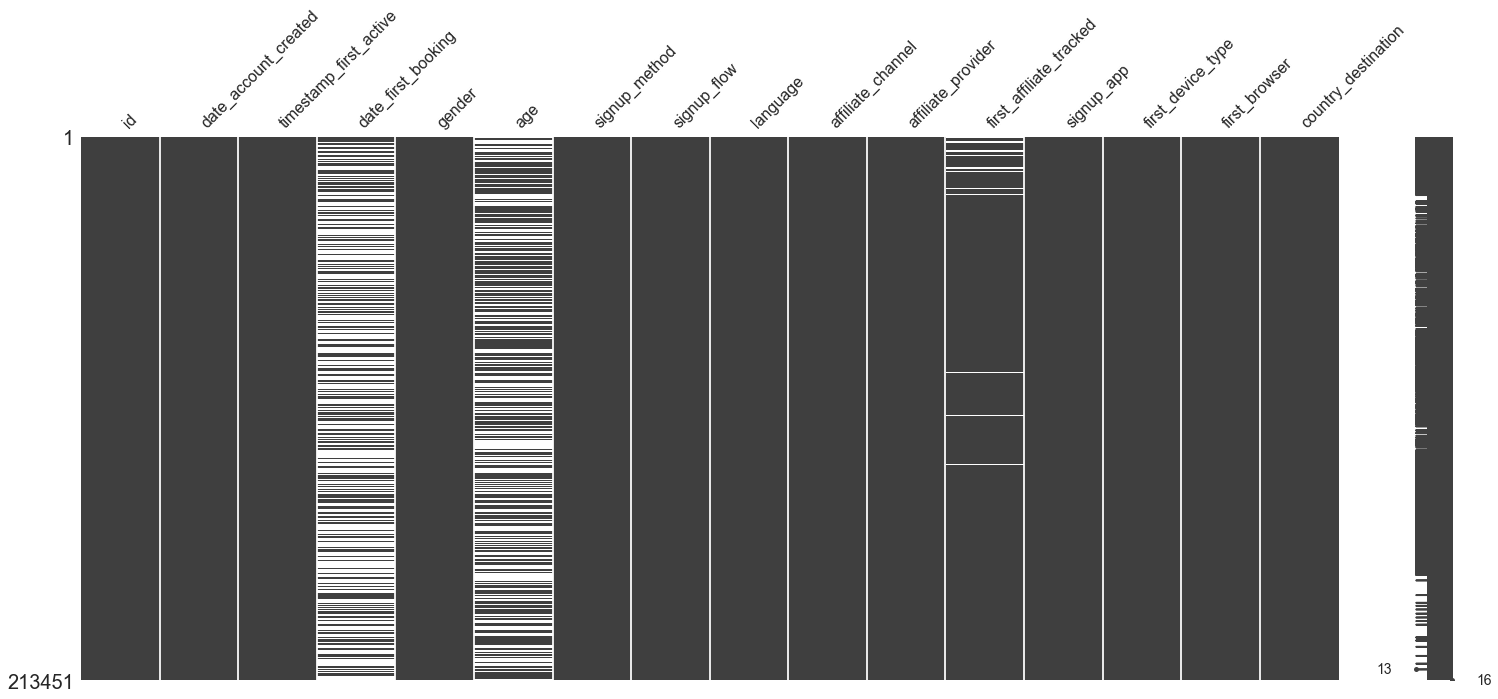

In [51]:
import missingno as nulls
nulls.matrix(my_data)

In the gender column we have "-unknown-" value, lets assign null inplace of "-unknown-" and again visualise the nulls density.

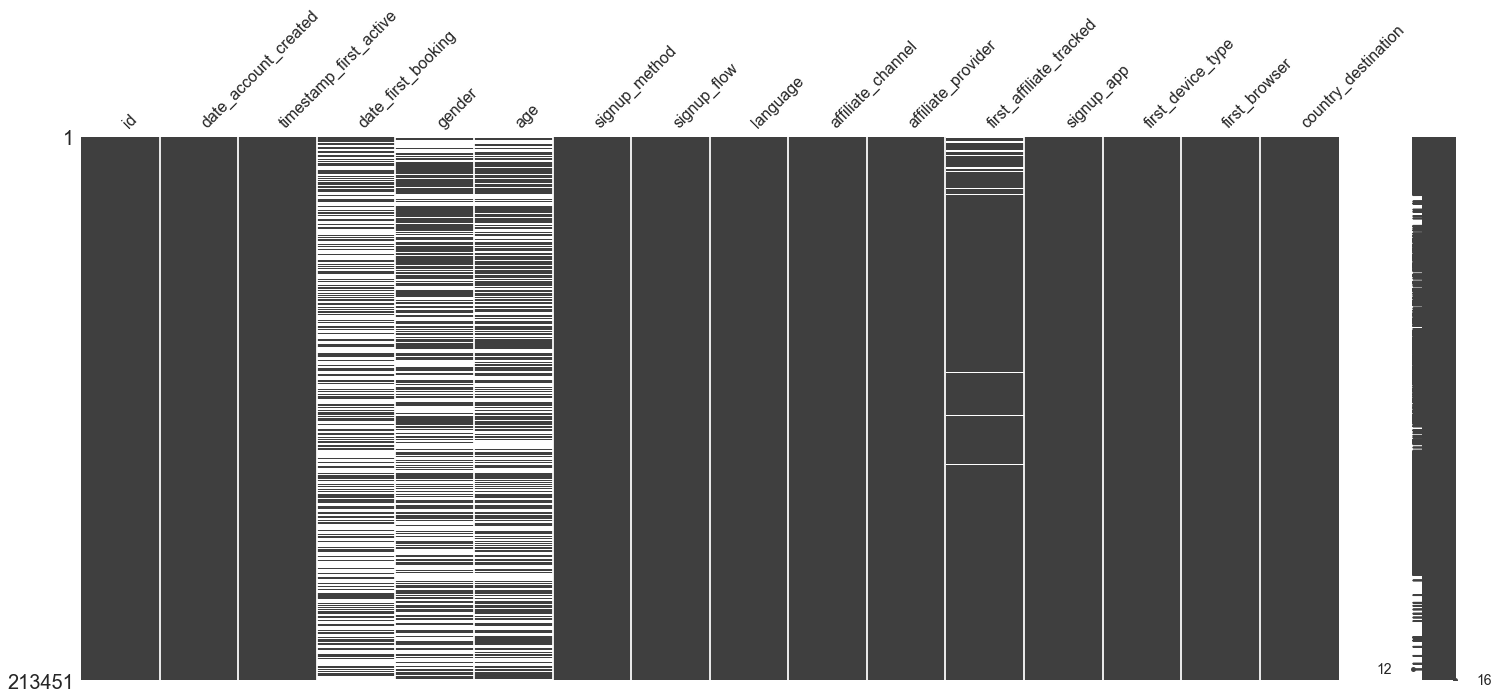

In [52]:
my_data['gender'] = my_data['gender'].replace('-unknown-',np.nan)
nulls.matrix(my_data)

How is Gender distribution for booked and unbooked registrations; and counrty wise distribution?

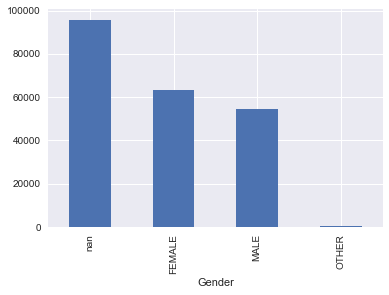

In [53]:
import seaborn as sb
import matplotlib.pyplot as plt

my_data['gender'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('Gender')

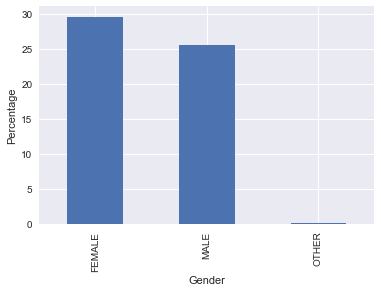

In [54]:
gender_percentage = (my_data['gender'].value_counts() / my_data.shape[0]) * 100
gender_percentage.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Percentage')

We can see that there are almost 30% Female, 26% Male and 1% Other. Therefore, almost 40% of user's gender is unknown.

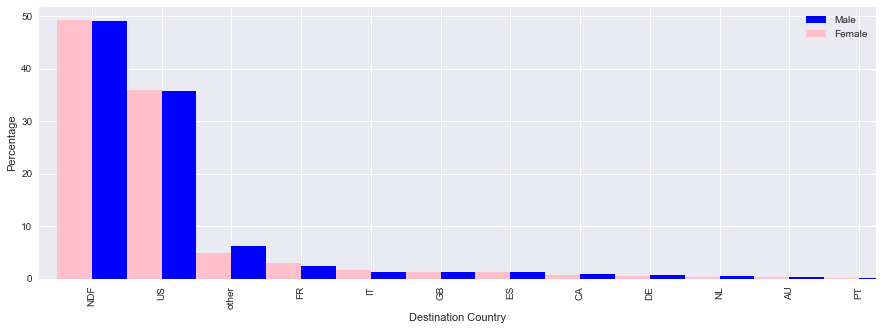

In [57]:
women = sum(my_data['gender'] == 'FEMALE')
men = sum(my_data['gender'] == 'MALE')

female_destinations = my_data.loc[my_data['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = my_data.loc[my_data['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

plt.subplots(nrows=1, ncols=1,figsize=(15,5))
male_destinations.plot(kind='bar', color='blue', position=0, label='Male')
female_destinations.plot(kind='bar', color='pink', position=1, label='Female')
plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')


There is almost no difference in gender wise travel. 

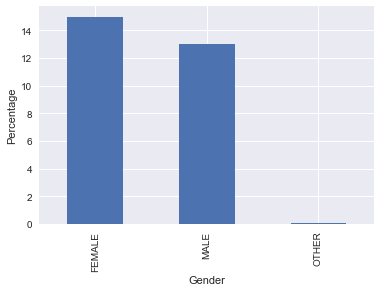

In [58]:
ndf_rmv = my_data[my_data['country_destination']!='NDF']
ndf_data = my_data[my_data['country_destination']=='NDF']

gender_percentage = (ndf_rmv['gender'].value_counts() / my_data.shape[0]) * 100
gender_percentage.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Percentage')



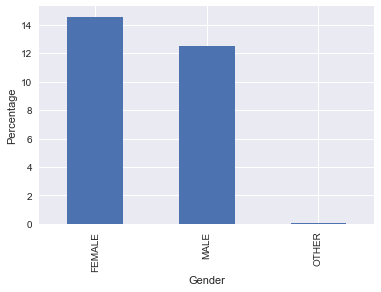

In [59]:
gender_percentage = (ndf_data['gender'].value_counts() / my_data.shape[0]) * 100
gender_percentage.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Percentage')

From above analysis we can conclude:
1) There are more female users than male users
2) Almost 50% of both Male and Female users haven't made any registration through Airbnb
3) 15% of the users population have made a registration are Female and 13% are Male, also 15% of the users population haven't made a registration are Female and 13% are Male. From which we can conclude that there is a 50-50% of gender wise distribution of registrations.

How is travel influenced by age groups? Is there any specific age group who registered/traveled more than other groups?

In [60]:
my_data['age'].describe()


count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

We have some unrealistic data here, maximum value of age is 2014, so lets explore more. 

In [61]:
print(sum(my_data['age'] > 100))
print(sum(my_data['age'] < 16))

2345
65


We have to filter these under aged and unrealistic age group users, we will assign null to them for now. Any user under the age 16 shouldn't be allowed to make a registration as per the company's policy, also its not realistic for anyone 100+ can travel(my assumption).

<function seaborn.utils.despine>

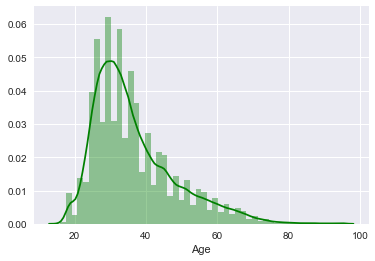

In [62]:
my_data.loc[my_data['age'] > 95, 'age'] = np.nan
my_data.loc[my_data['age'] < 16, 'age'] = np.nan

import seaborn as sb
sb.distplot(my_data['age'].dropna(),color = 'green')
plt.xlabel('Age')
sb.despine

<function seaborn.utils.despine>

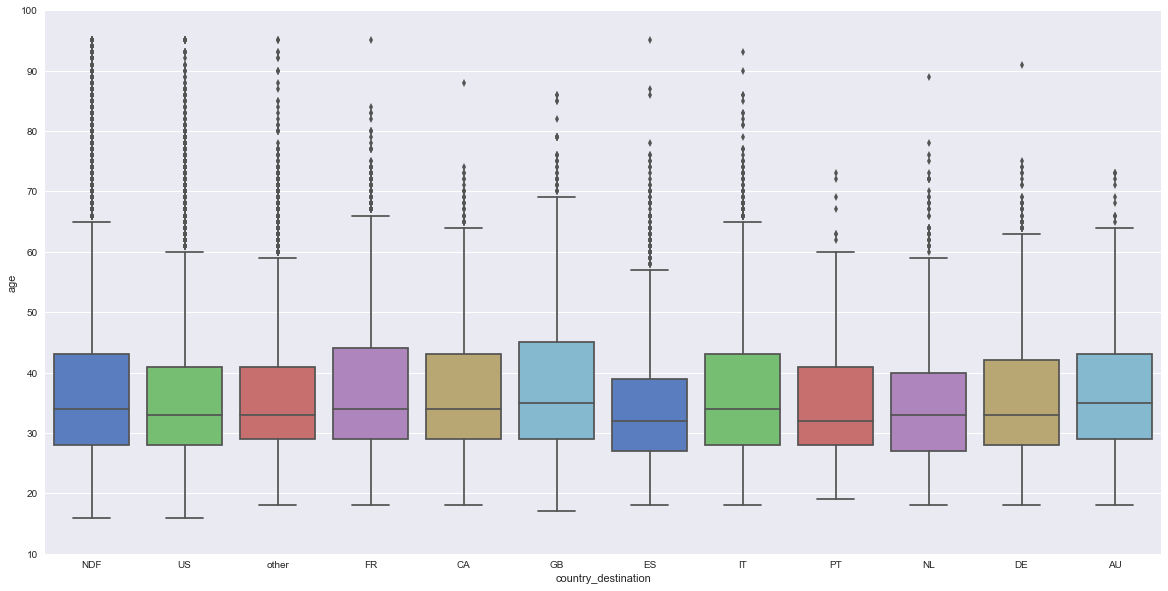

In [63]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
sb.boxplot(x='country_destination', y='age', data=my_data, palette="muted", ax =ax)
ax.set_ylim([10, 100])
sb.despine


Here we are making segments/groups for users with different range of ages and trying to find the travel pattern of each group

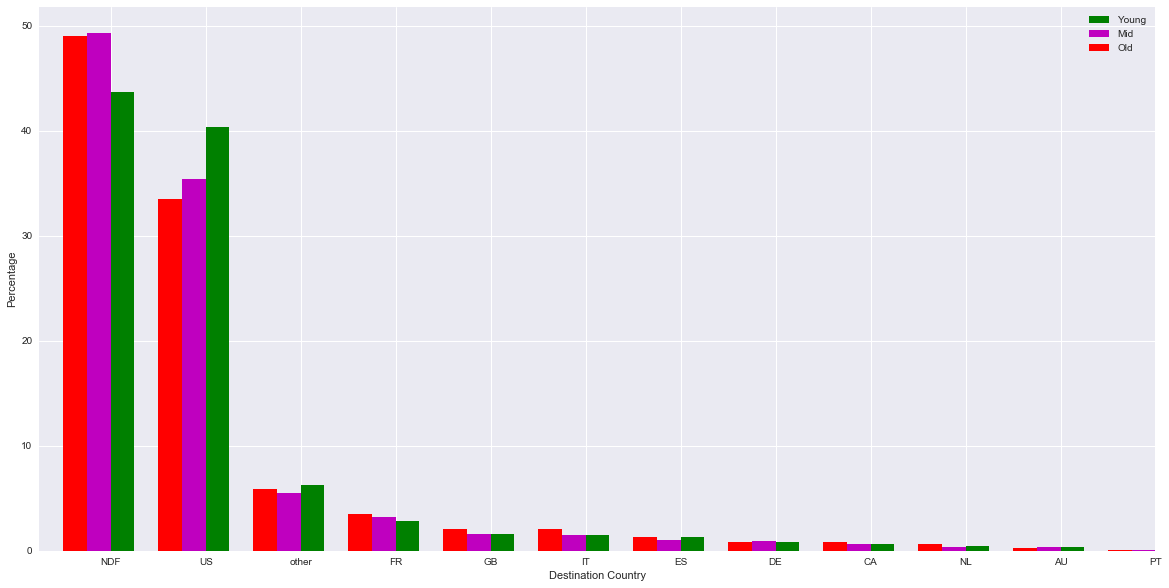

In [64]:
age_young = 40
age_old = 60

young = sum(my_data.loc[my_data['age'] < age_young, 'country_destination'].value_counts())
mid = sum(my_data.loc[my_data['age'].between(40,60,inclusive = True), 'country_destination'].value_counts())
old = sum(my_data.loc[my_data['age'] > age_old, 'country_destination'].value_counts()) 

young_countries = my_data.loc[my_data['age'] < age_young, 'country_destination'].value_counts() / young * 100
mid_countries = my_data.loc[my_data['age'].between(40,60,inclusive = True),'country_destination'].value_counts()/mid*100
old_countries = my_data.loc[my_data['age'] > age_old, 'country_destination'].value_counts() / old * 100
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
young_countries.plot(kind='bar',width=0.25,color='green', position=0, label='Young',rot=0)
mid_countries.plot(kind='bar',width=0.25,color='m',position=1,label='Mid',rot=0)
old_countries.plot(kind='bar',width=0.25,color='red', position=2, label='Old',rot=0)
plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sb.despine()

Which age group consitutes largest percentage of users in airbnb?

([<matplotlib.patches.Wedge at 0x25ac0365c50>,
  <matplotlib.text.Text at 0x25ac0642ba8>])

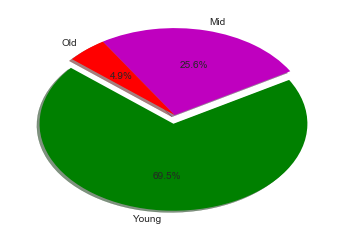

In [65]:
young_perc = young / (young+old+mid) * 100
mid_perc = mid/(young+old+mid)*100
old_perc = old / (young+old+mid) * 100

age_perc = [young_perc,mid_perc,old_perc]
explode = [0.1,0,0]
labels = 'Young', 'Mid', 'Old'
colors = ['g','m','r']
plt.pie(age_perc, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

Here we are finding which age group have traveled more than other two by plotting a pie chart:

([<matplotlib.patches.Wedge at 0x25ac0358e48>,
  <matplotlib.text.Text at 0x25ac06d8860>])

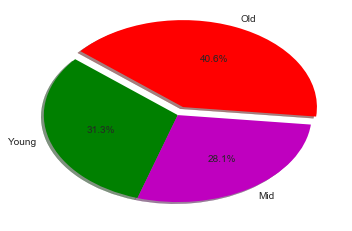

In [66]:
young_ndf = sum((my_data['age'].loc[my_data['age'] < age_young]).value_counts())
mid_ndf = sum((my_data['age'].loc[my_data['age'].between(40,60,inclusive = True)]).value_counts())
old_ndf = sum((my_data['age'].loc[my_data['age'] > age_old]).value_counts())

young_countries_noNdf = sum((ndf_rmv['age'].loc[ndf_rmv['age'] < age_young]).value_counts()) / young_ndf * 100
mid_countries_noNdf = sum((ndf_rmv['age'].loc[ndf_rmv['age'].between(40,60,inclusive = True)]).value_counts())/mid_ndf*100
old_countries_noNdf = sum((ndf_rmv['age'].loc[ndf_rmv['age'] > age_old]).value_counts()) / old_ndf * 100

age_perc_booked = [young_countries_noNdf,mid_countries_noNdf,old_countries_noNdf]

explode1 = [0,0,0.1]
labels = 'Young', 'Mid', 'Old'
colors = ['g','m','r']
plt.pie(age_perc_booked,explode=explode1,  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

From above analysis on age and country destination, we can conclude that:
1)The age group of 16-40 years has highest number of users, no wonder young people want to travel and explore.
2)Young age grouped users are likely to travel in USA than other 2 groups.
3)There are 69.5% of users in young age group category(<40 years).
4)Of all the age groups Old age category people are highly likely to travel/make a registration through airbnb 40.6%, which means for every 5 old age users created atleast 2 will register with airbnb. 

How airbnb is doing in terms of number of accounts created over the years? Also, how many active users(users )?

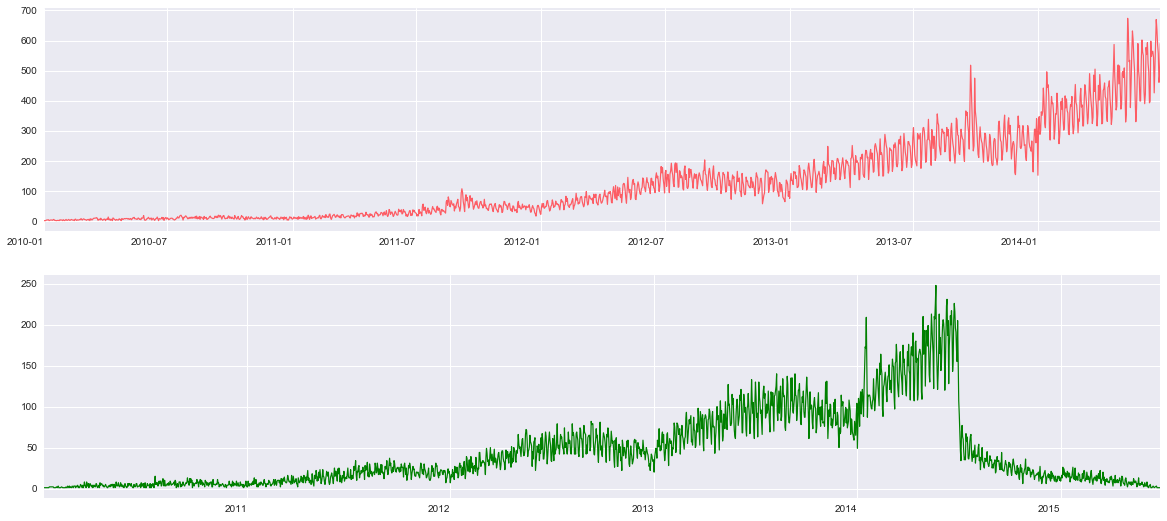

In [67]:
fig,ax = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
plt.subplot(2, 1, 1)
my_data['date_account_created'].value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64',rot=0)
plt.subplot(2, 1, 2)
my_data['date_first_booking'].value_counts().plot(kind='line', linewidth=1.2, color='g',rot=0)


Airbnb has grown a lot during early 2013 to mid 2014, with 400% increase in the volume of users created. Knowing this metric is crucial for any company as it showcases companies ability of customer acquisition. But, this metric alone cannot show how good a company is doing, we need number of active users for this. Second line graph shows us the same 400% increase from 2013 to mid of 2014, but after that there is a huge slide in number of active users. This should be a huge concern for airbnb. As we don't have enough data of accounts created to know why there is a slide we leave it here. 

We can conclude that there is a positive correlation between the date_created and date_first_booked, atleast till 2014-07(till th data we have for date_created). 

Number of users created yearly, monthly and day of the week trend analysis?

C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

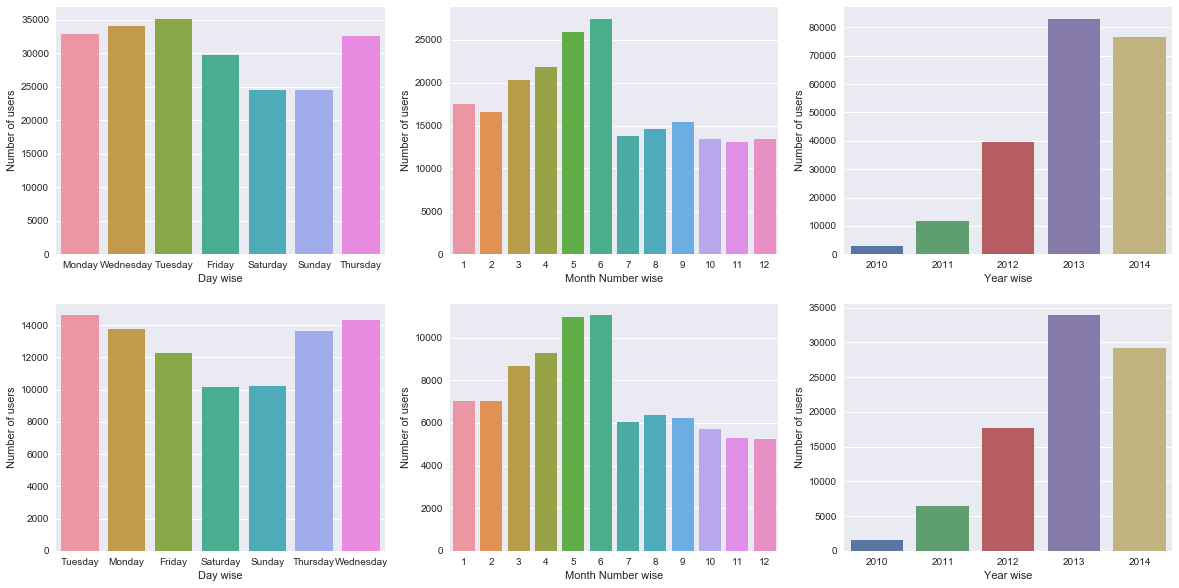

In [75]:
my_data['weekday']=pd.to_datetime(my_data['date_account_created']).dt.weekday_name
my_data['month']=pd.to_datetime(my_data['date_account_created']).dt.month
my_data['year']=pd.to_datetime(my_data['date_account_created']).dt.year

fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
plt.subplot(2, 3, 1)
sb.countplot(x='weekday',data=my_data)
plt.xlabel('Day wise')
plt.ylabel('Number of users')

plt.subplot(2,3,2)
sb.countplot(x='month',data=my_data)
plt.xlabel('Month Number wise')
plt.ylabel('Number of users')

plt.subplot(2,3,3)
sb.countplot(x='year',data=my_data)
plt.xlabel('Year wise')
plt.ylabel('Number of users')

ndf_rmv['weekday']=pd.to_datetime(ndf_rmv['date_account_created']).dt.weekday_name
ndf_rmv['month']=pd.to_datetime(ndf_rmv['date_account_created']).dt.month
ndf_rmv['year']=pd.to_datetime(ndf_rmv['date_account_created']).dt.year

plt.subplot(2, 3, 4)
sb.countplot(x='weekday',data=ndf_rmv)
plt.xlabel('Day wise')
plt.ylabel('Number of users')

plt.subplot(2,3,5)
sb.countplot(x='month',data=ndf_rmv)
plt.xlabel('Month Number wise')
plt.ylabel('Number of users')

plt.subplot(2,3,6)
sb.countplot(x='year',data=ndf_rmv)
plt.xlabel('Year wise')
plt.ylabel('Number of users')
sb.despine()


First row figures shows both booked and unbooked trend and second row figures only shows Non-NDF data, i.e; booked/registered to travel data.

Analysis on the device used to make a registrations:

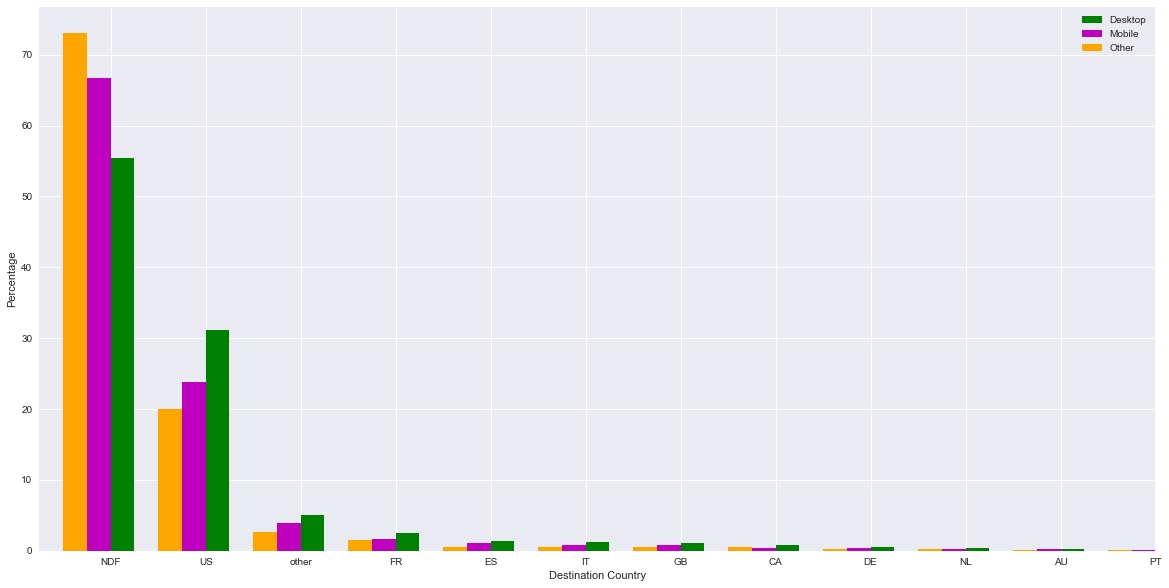

In [76]:
my_data['first_device_type'] = my_data['first_device_type'].replace(['Mac Desktop','Windows Desktop','Desktop (Other)'],'Desktop')
my_data['first_device_type'] = my_data['first_device_type'].replace(['iPhone','iPad','Android Tablet','Android Phone','SmartPhone (Other)'],'Mobile Device')

desktop_count = sum(my_data.loc[my_data['first_device_type'] == "Desktop", 'country_destination'].value_counts())
mobile_count = sum(my_data.loc[my_data['first_device_type']== "Mobile Device",'country_destination'].value_counts())
other_count = sum(my_data.loc[my_data['first_device_type'] == 'Other/Unknown', 'country_destination'].value_counts()) 


desktop = my_data.loc[my_data['first_device_type'] == "Desktop", 'country_destination'].value_counts() / desktop_count * 100
mobiles = my_data.loc[my_data['first_device_type'] == "Mobile Device", 'country_destination'].value_counts() / mobile_count * 100
other = my_data.loc[my_data['first_device_type'] == "Other/Unknown", 'country_destination'].value_counts() / other_count * 100

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
desktop.plot(kind='bar',width=0.25,color='g', position=0, label='Desktop',rot=0)
mobiles.plot(kind='bar',width=0.25,color='m',position=1,label='Mobile',rot=0)
other.plot(kind='bar',width=0.25,color='orange', position=2, label='Other',rot=0)
plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sb.despine()

C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(0.0, 100.0, 0.0, 100.0)

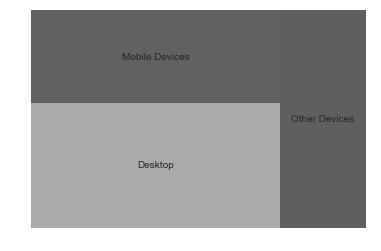

In [77]:
desktop_count_ndf = sum((my_data['first_device_type'].loc[my_data['first_device_type'] == "Desktop"]).value_counts())
mobile_count_ndf = sum((my_data['first_device_type'].loc[my_data['first_device_type']== "Mobile Device"]).value_counts())
other_count_ndf = sum((my_data['first_device_type'].loc[my_data['first_device_type'] == 'Other/Unknown']).value_counts()) 

ndf_rmv['first_device_type'] = ndf_rmv['first_device_type'].replace(['Mac Desktop','Windows Desktop','Desktop (Other)'],'Desktop')
ndf_rmv['first_device_type'] = ndf_rmv['first_device_type'].replace(['iPhone','iPad','Android Tablet','Android Phone','SmartPhone (Other)'],'Mobile Device')

desktop_noNdf = sum((ndf_rmv['first_device_type'].loc[ndf_rmv['first_device_type'] == "Desktop"]).value_counts()) / desktop_count_ndf * 100
mobiles_noNdf = sum((ndf_rmv['first_device_type'].loc[ndf_rmv['first_device_type'] == "Mobile Device"]).value_counts()) / mobile_count_ndf * 100
other_noNdf = sum((ndf_rmv['first_device_type'].loc[ndf_rmv['first_device_type'] == "Other/Unknown"]).value_counts()) / other_count_ndf * 100

device_perc_booked = [desktop_noNdf,mobiles_noNdf,other_noNdf]

import squarify as sq
sq.plot(sizes=[desktop_noNdf,mobiles_noNdf,other_noNdf], label=["Desktop", "Mobile Devices", "Other Devices"], alpha=.7 )
plt.axis('off')


From above analysis we can conclude that Desktops are highly used for making registrations, next is mobile devices and lastly other devices.
Also, those users who have used desktops for registrations are less likely not to make a registration with 55% NDF (more likely to make registration 45%) where as mobile is 65% and other is 72% of not making a registration. 

Numbers of users traveled to each country:
1) NDF included to compare users who have created account but not used with users who traveled.
2) NDF excluded to compare travel distributions among each countries.

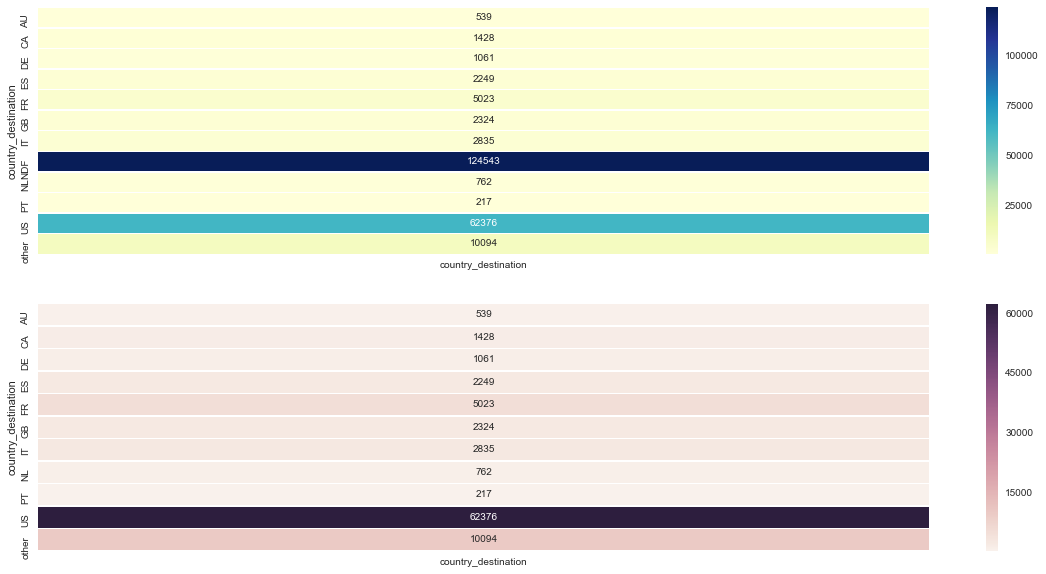

In [78]:
fig,ax = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
plt.subplot(2,1,1)
grpd_data = my_data.groupby(['country_destination'])['country_destination'].count()
grpd_data = pd.DataFrame(grpd_data)
sb.heatmap(grpd_data,linewidth=0.5,annot=True, fmt="d",cmap="YlGnBu")
plt.subplot(2,1,2)
my_data_noNDF = my_data.loc[my_data['country_destination']!='NDF']
grpd_data_noNDF = my_data_noNDF.groupby(['country_destination'])['country_destination'].count()
grpd_data_noNDF = pd.DataFrame(grpd_data_noNDF)
sb.heatmap(grpd_data_noNDF,linewidth=0.5,annot=True, fmt="d")

I have created 2 methods to plot bar and stacked bar charts for the rest of the features in terms of travel destination.

In [79]:
def plots(var):
    a = pd.crosstab(my_data['country_destination'],my_data[var]).apply(lambda x: x/x.sum()*100, axis=1)
    a.plot(kind='bar',width=0.75, figsize=(16, 8),label=var,rot=0)
        
def plots1(var):
    a = pd.crosstab(my_data[var],my_data['country_destination']).apply(lambda x: x/x.sum()*100, axis=1)
    a.plot(kind='bar',stacked = True, width=0.75,figsize=(16, 8),label=var)



By calling above methods we are achieving code reusability.
(Note: Please use slide bar to scroll down to view all charts)

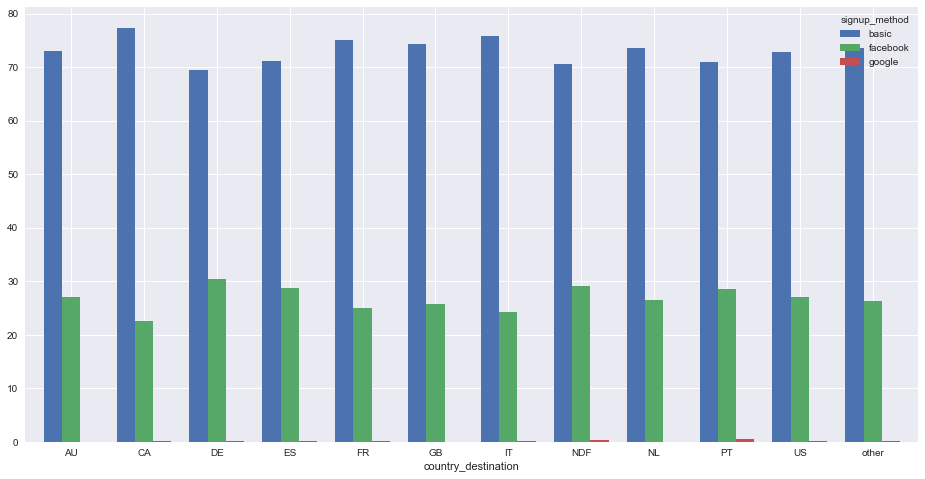

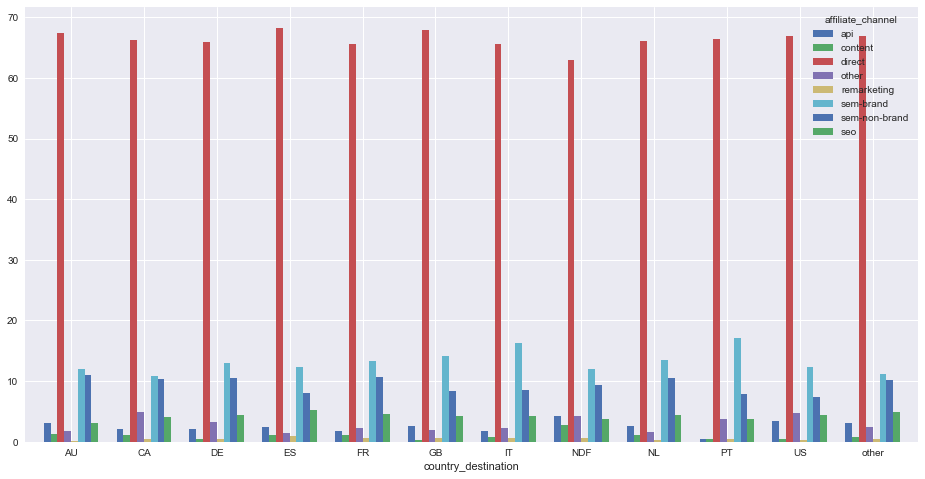

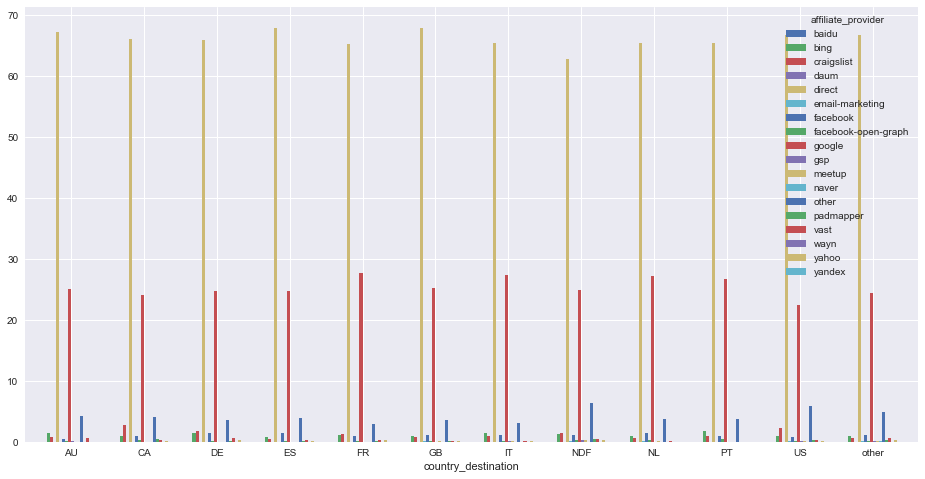

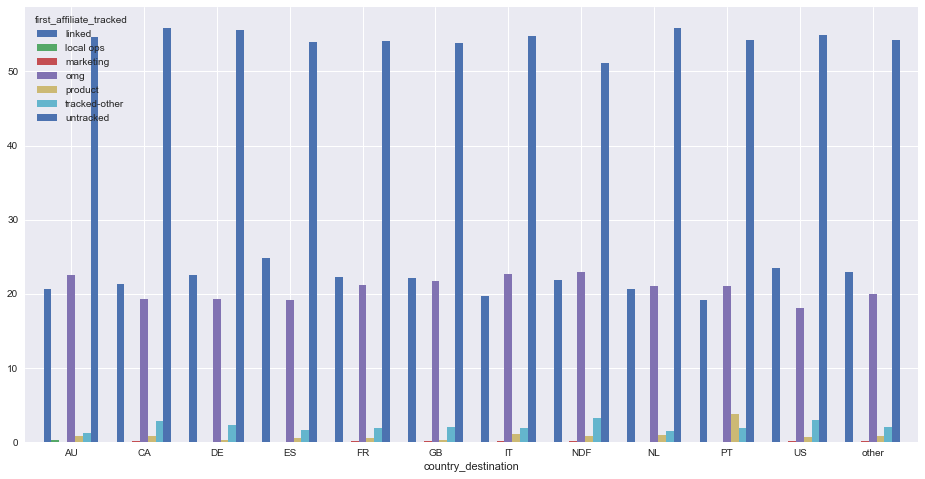

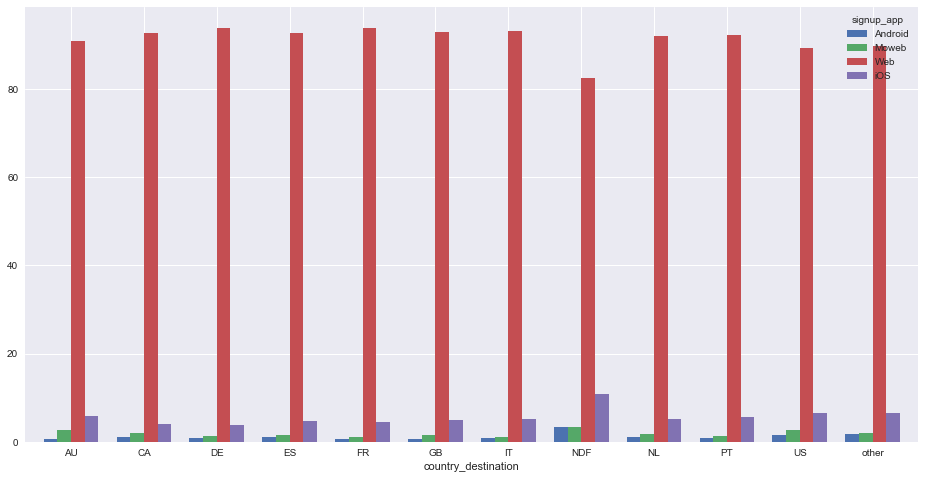

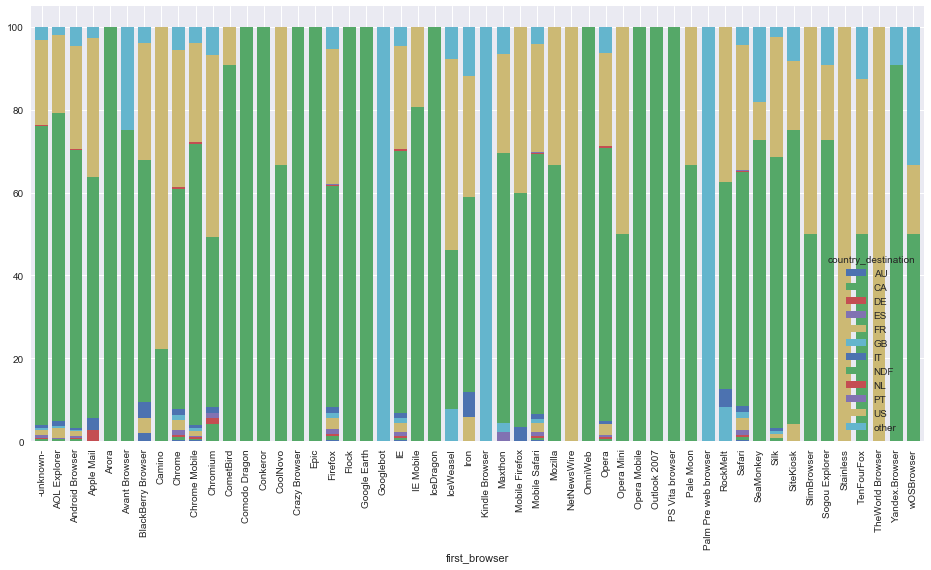

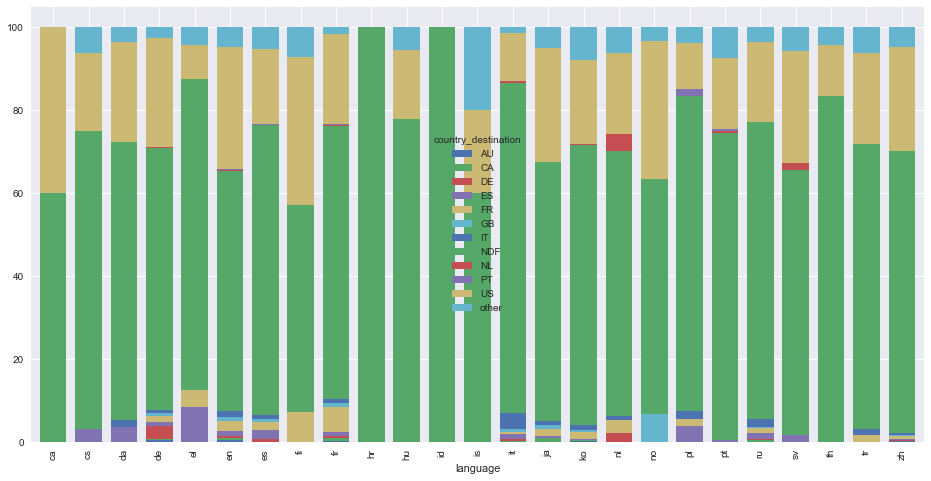

In [80]:
plots("signup_method")
plots("affiliate_channel")
plots("affiliate_provider")
plots("first_affiliate_tracked")
plots("signup_app")
plots1("first_browser")
plots1("language")

Data pre-processing:

From prior analysis of gender data, we came to conclusion that there isn't any difference in gender wise travel. Also, female are slightly more than male. So we can alternatively assign male and female to null values.

In [81]:
i=0
def get_gender(gender):
    global i
    if gender != 'FEMALE' and gender != 'MALE':
        return 'FEMALE' if(i % 2) else 'MALE'
    i = i + 1
    return gender

my_data['gender'] = my_data['gender'].apply(get_gender)
my_data['gender']   = my_data['gender'].apply(get_gender)

I have created my own methods for handiling nulls(Imputing). assign_rand(var) is used for numercial data and assign_rand_cat(var) for categorical data. Both methods accepts a variable name in the dataset as input with data type String and generates a cleaned data for the passed variable.

In [82]:
def aver(data):
    return data.mean()
def stdv(data):
    return data.std()
def nullCount(data):
    return data.isnull().sum()

assign_rand(var): Method to fill NAs for numerical data. Random values in the range of one std. deviation on either side of mean is used to fill the data.
assign_rand_cat(var): Method to fill NAs for categorical data. Any one value in the category variable is assigned each time a null appears.

In [83]:
def assign_rand(var):
    av   = aver(my_data[var])
    sd      = stdv(my_data[var])
    count = nullCount(my_data[var])
    rand = np.random.randint(av - sd, av + sd, size = count)
    my_data[var][np.isnan(my_data[var])] = rand


#Categorical data cleaning
def assign_rand_cat(var):
    uniq_num = len(np.unique(my_data[var].value_counts()))
    num_null = sum(my_data[var].isnull())
    rand = np.random.randint(0, uniq_num, size = num_null)
    range = my_data[var].value_counts().index
    my_data[var][my_data[var] != my_data[var]] = range[rand]


We will assign random values for age which falls within 1 standard deviation from mean of age.

In [84]:
assign_rand('age')
assign_rand_cat('first_affiliate_tracked')

C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Methods to extract Year, Month and Weekday

In [85]:
def getYear(data):
    year = pd.to_datetime(data).dt.year
    return year

def getMonth(data):
    month = pd.to_datetime(data).dt.month
    return month

def getWeekDay(data):
    week_day = pd.to_datetime(data).dt.weekday_name
    return week_day


In [86]:
my_data['fbook_year'] = getYear(my_data['date_first_booking'])
my_data['fbook_month'] = getMonth(my_data['date_first_booking'])
my_data['fbook_weekday'] = getWeekDay(my_data['date_first_booking'])

assign_rand('fbook_year')
assign_rand('fbook_month')
assign_rand_cat('fbook_weekday')

C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Copying data before encoding, just to preserve the gold copy.

In [87]:

data = my_data

Encoding categorical variables, preparing for building classification model.

In [88]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data['gender'] = labelencoder_X.fit_transform(data['gender'])
data['signup_method'] = labelencoder_X.fit_transform(data['signup_method'])
data['language'] = labelencoder_X.fit_transform(data['language'])
data['affiliate_channel'] = labelencoder_X.fit_transform(data['affiliate_channel'])
data['affiliate_provider'] = labelencoder_X.fit_transform(data['affiliate_provider'])
data['first_affiliate_tracked'] = labelencoder_X.fit_transform(data['first_affiliate_tracked'])
data['signup_app'] = labelencoder_X.fit_transform(data['signup_app'])
data['first_device_type'] = labelencoder_X.fit_transform(data['first_device_type'])
data['first_browser'] = labelencoder_X.fit_transform(data['first_browser'])
data['fbook_weekday'] = labelencoder_X.fit_transform(data['fbook_weekday'])
data['weekday'] = labelencoder_X.fit_transform(data['weekday'])

In the next step we are dropping all the features which are not necessary for us. Also, target variable is assigned to y.

In [89]:
X = data.drop(["country_destination", "id", 'date_first_booking','date_account_created','timestamp_first_active'],axis=1)
y = data['country_destination']

We are doing cross validation with 70% of the data assigned for Training and 30% for Testing. 

In [90]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


C:\Users\abhik\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


I am using two classifiers for prediction
1) Logistic Regression
2) Random Forest

In [91]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [92]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)


To know whiich model is better for airbnb, we are conducting classification report which gives us precision, recall and f1-score for each model. We choose precision as deciding factor.

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       158
         CA       0.00      0.00      0.00       397
         DE       0.00      0.00      0.00       315
         ES       0.00      0.00      0.00       693
         FR       0.00      0.00      0.00      1461
         GB       0.00      0.00      0.00       696
         IT       0.00      0.00      0.00       806
        NDF       0.71      0.86      0.78     37441
         NL       0.00      0.00      0.00       223
         PT       0.00      0.00      0.00        66
         US       0.51      0.51      0.51     18698
      other       0.00      0.00      0.00      3082

avg / total       0.56      0.65      0.60     64036



C:\Users\abhik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Above is the result for Logistic regression having 56% of precision.

In [94]:
print(classification_report(Y_pred,y_pred))

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00         8
         CA       0.00      0.00      0.00        31
         DE       0.00      0.00      0.00        22
         ES       0.00      0.00      0.00        45
         FR       0.00      0.00      0.00       121
         GB       0.00      0.00      0.00        35
         IT       0.00      0.00      0.00        91
        NDF       0.73      0.84      0.78     38922
         NL       0.00      0.00      0.00        16
         PT       0.00      0.00      0.00         7
         US       0.66      0.51      0.58     24361
      other       0.00      0.00      0.00       377

avg / total       0.69      0.71      0.69     64036



C:\Users\abhik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The precision and other metric values for Random forest is far better than Logistic regression, hence for this dataset I recommend Random forest data model for prediction.